# Lab Assignment 1 
### Learning and generalisation in feed-forward networks — from perceptron learning to backprop

### 3. Part I
####  3.1 Classification with a single-layer perceptron
##### 3.1.1 Generation of linearly-separable data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(shuffle=1, verbose=1, pattern=1):
    
    n = 10
    mu_A = np.array([2.0, 1.0])
    mu_B = np.array([-2.0, 0.0])
    sigma_A = 0.5
    sigma_B = 0.5

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))

    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

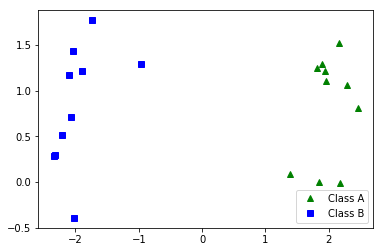

(array([[ 2.16152904,  1.81539364,  1.39432379,  2.28204367,  1.9418337 ,
          1.89199515,  2.17275564,  1.8457726 ,  2.46332111,  1.96040912],
        [ 1.52770285,  1.24433001,  0.09128847,  1.06499293,  1.21899758,
          1.29493445, -0.01103495, -0.00432035,  0.80658537,  1.10270888]]),
 array([[-2.02093657, -2.10768668, -2.06588503, -1.73812443, -2.34453603,
         -0.96893878, -2.3268807 , -1.89218458, -2.21059421, -2.04514167],
        [-0.39355279,  1.17691166,  0.70750405,  1.77299976,  0.28118946,
          1.28815456,  0.29914754,  1.2173182 ,  0.50982106,  1.43309132]]))

In [27]:
generatePattern(shuffle=1,pattern=0)

#### 3.1.2 Classification with a single-layer perceptron and analysis

In [31]:
#Randomly initalize weight matrix W
def weights_init(n_dim,n_points,scale):
    W = scale*np.random.randn(n_dim,n_points)
    return W


In [32]:
def error(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(np.sqrt(((T-Y)**2)))

def update_weights_delta_rule(eta,T,W,X):
    H = np.matmul(W,X)
    err = error(T,H)
    dW = -eta*np.matmul(H-T,np.transpose(X))
    return dW, err

def update_weights_perceptron(eta,T,W,X):
    H = np.matmul(W,X)
    Y = np.sign(H)
    err = error(T,Y)
    dW = -eta*np.matmul((Y-T),np.transpose(X))
    #dW = eta*err*X
    return dW, err


def train_network(eta,X,W,T,epochs,plot=1,sequential=False):
    
    errors = np.zeros((2,epochs))
    W_perceptron = W
    W_delta_rule = W
    
    if plot:
        linespace = np.linspace(-2,2,10)
        line_perceptron = get_decisionBound(W_perceptron)
        line_delta_rule = get_decisionBound(W_delta_rule)
        
        plt.subplot(211)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Perceptron Learning Rule')
        
        plt.subplot(212)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Delta Learning Rule')
        
        
        
    
    for i in range(epochs):
        
        if sequential:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule_sequential(eta,X,T,W_delta_rule)
        else:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule(eta,T,W_delta_rule,X)
        
        dW_perceptron, err_perceptron = update_weights_perceptron(eta,T,W_perceptron,X)
        
        W_delta_rule = dw_delta_rule + W_delta_rule
        W_perceptron = dW_perceptron + W_perceptron
        
        errors[0,i] = err_perceptron
        errors[1,i] = err_delta_rule
        
        if plot:
            line_perceptron = get_decisionBound(W_perceptron)
            line_delta_rule = get_decisionBound(W_delta_rule)
    
            #plt_line_perceptron.set_ydata(line_perceptron)
            #plt_line_delta_rule.set_ydata(line_delta_rule)
            
            #plt.ion()
            #plt.draw()
            #plt_line_perceptron.remove()
            #plt_line_delta_rule.remove()
            
            plt.subplot(211)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Perceptron Learning Rule')
        
            plt.subplot(212)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Delta Learning Rule')
            
            plt.show()
            plt.pause(0.1)
    
            #print(linespace.shape,line.shape)
    
        
    
    #plt.show()
            
    return W_perceptron, W_delta_rule, errors


In [29]:
def get_decisionBound(w):
    #print(w.shape)
    slope_vec = np.array([w[0][1],-w[0][0]])
    slope = slope_vec[1]/slope_vec[0]
    intercept = w[0][2]/np.linalg.norm(w)
    
    linespace = np.linspace(-2,2,10)
    line = slope*linespace + intercept
    
    return line

/Users/karstenstadler/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


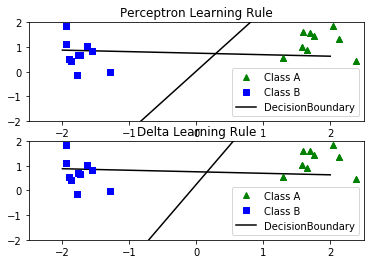

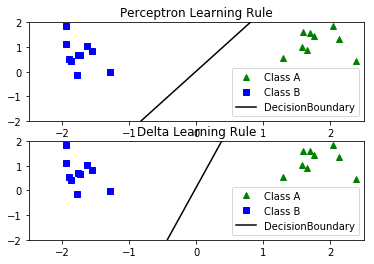

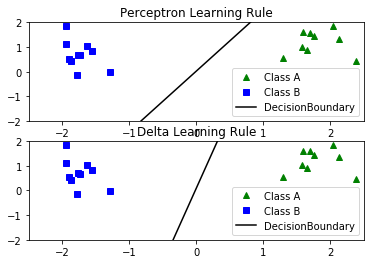

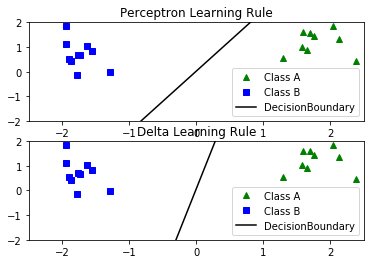

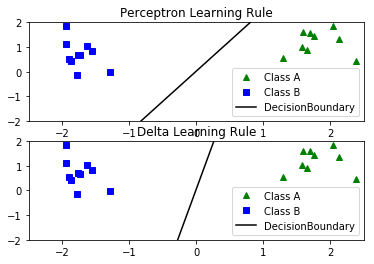

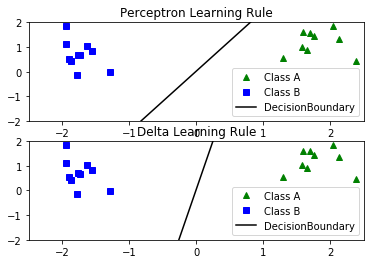

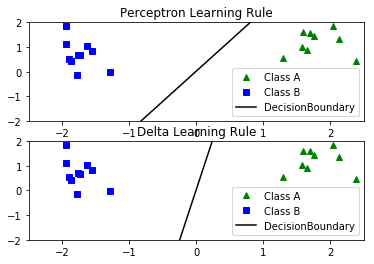

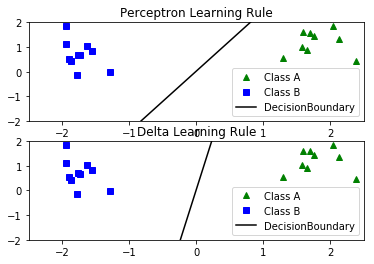

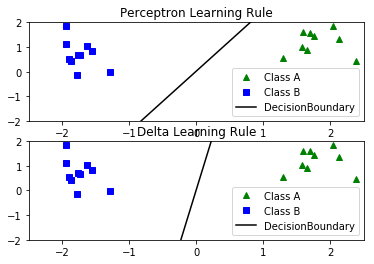

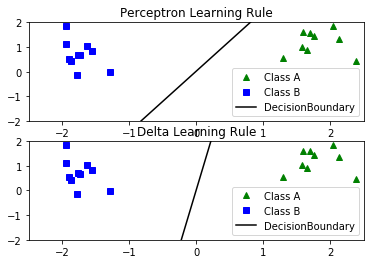

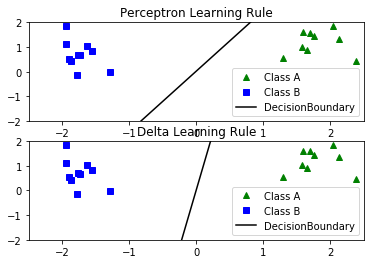

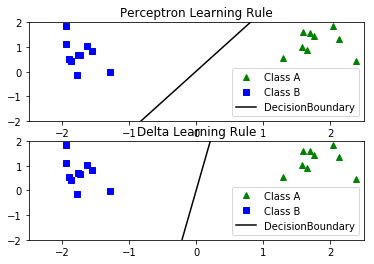

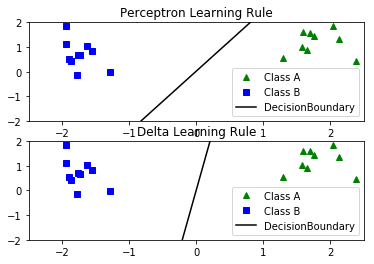

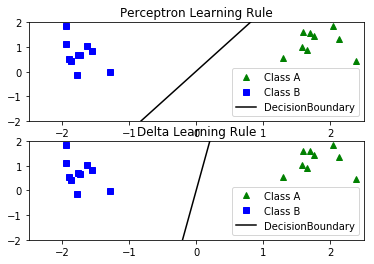

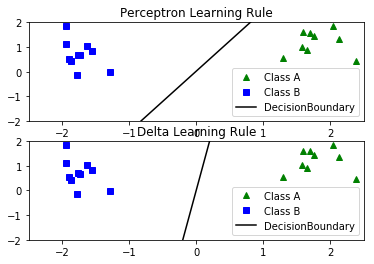

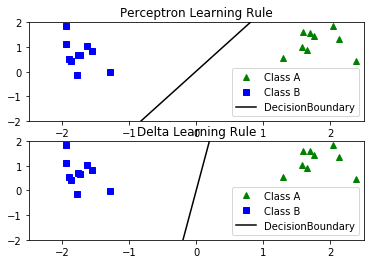

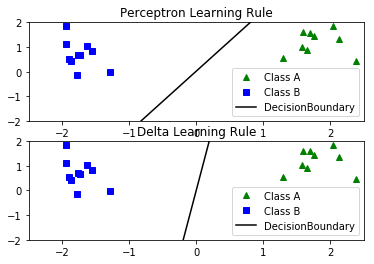

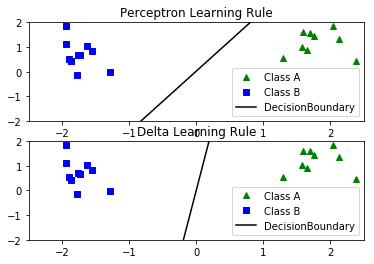

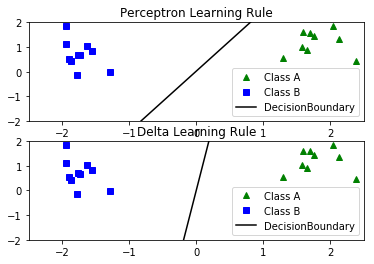

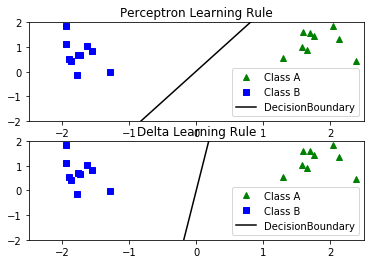

In [33]:
#Perceptron and Delta learning rule

eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2

X, T = generatePattern(verbose=0,pattern=1)
W = weights_init(n_outputs,n_dim,scale)

W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
#W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs,0)
#W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
#plt_decisionBound(W_perceptron)
#plt_decisionBound(W_delta_rule)



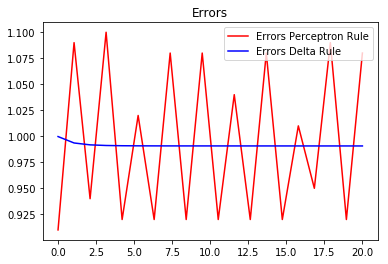

[[0.91       1.09       0.94       1.1        0.92       1.02
  0.92       1.08       0.92       1.08       0.92       1.04
  0.92       1.08       0.92       1.01       0.95       1.09
  0.92       1.08      ]
 [0.99973569 0.99357033 0.99175961 0.99114895 0.99091616 0.99081888
  0.99077526 0.99075427 0.99074317 0.99073648 0.99073179 0.99072801
  0.99072466 0.99072153 0.99071852 0.99071558 0.99071269 0.99070984
  0.99070703 0.99070426]]


In [8]:
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
plt.legend(handles=[plt_errs_perceptron, plt_errs_delta_rule])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

print(errors)

In [9]:
def update_weights_delta_rule_sequential(eta,X,T,W):
    weights = 0
    for i in range(len(T)):
        #X1_sample = X[0][i]
        #X2_sample = X[1][i]
        #X3_sample = X[2][i]
        X_sample = X[:,i]
        T_sample = T[i]

        H = np.matmul(W,X_sample)
        dW = -eta*(H-T_sample)*np.transpose(X_sample)
        err = error(T,H)
        
        weights = weights+dW
        
    return weights, err